In [1]:
import os

from wpg.wpg_uti_wf import plot_intensity_map

from felpy.model.tools import scale
from felpy.model.core.wavefront import Wavefront
from felpy.model.beamlines.exfel_spb.methods import setup_spb
from felpy.analysis.dataset import Dataset

from labwork.about import dCache

from felpy.model.core.beamline import Beamline
from wpg.optical_elements import Aperture
from felpy.model.tools import propagation_parameters


{'history': {'parent': {'info': {'data_description': array([b'Objective:\n', b'\n',
       b'Input data for start-to-end x-ray free-electron laser simulation of a single\n',
       b'particle experiment\n', b'\n', b'Date: 04.09.2014\n', b'\n',
       b'M.V. Yurkov: mikhail.yurkov@desy.de\n',
       b'E.A. Schneidmiller: evgeny.schneidmiller@desy.de\n',
       b'tel. 2676\n', b'\n', b'======================\n', b'\n',
       b'SASE1/2\n', b'Electron energy = 12 GeV\n',
       b'Wavelength 0.25 nm (5 keV)\n',
       b'Bunch parameters: 250 pC, baseline parameters (DESY 11-152)\n',
       b'Simulation code: FAST\n', b'Actual number of particles\n',
       b'Azimuthal harmonics: -1...1\n',
       b'Undulator structure with gaps\n', b'===\n', b'\n',
       b'File name: XFEL_S1_04.96keV_12.0GeV_0250pC_SASE_U_BLI_2014-09-04_FAST_\n',
       b'\n', b'Number of simulation runs: 70\n', b'\n', b'===\n', b'\n',
       b'Output points along undulator:\n', b'\n',
       b'File No.        z, m\tComme

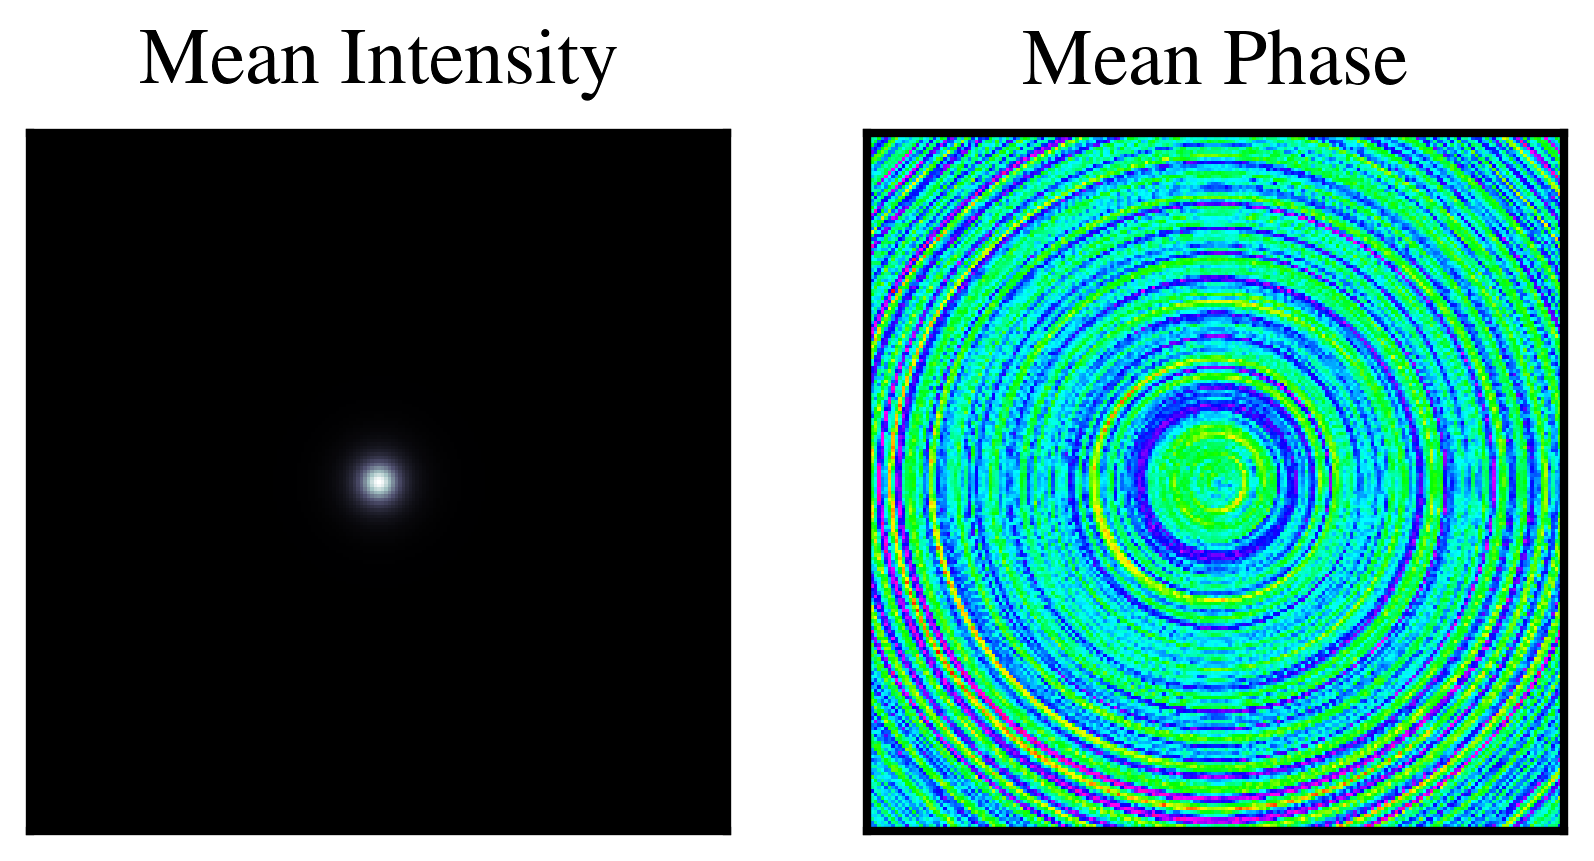

None
d1


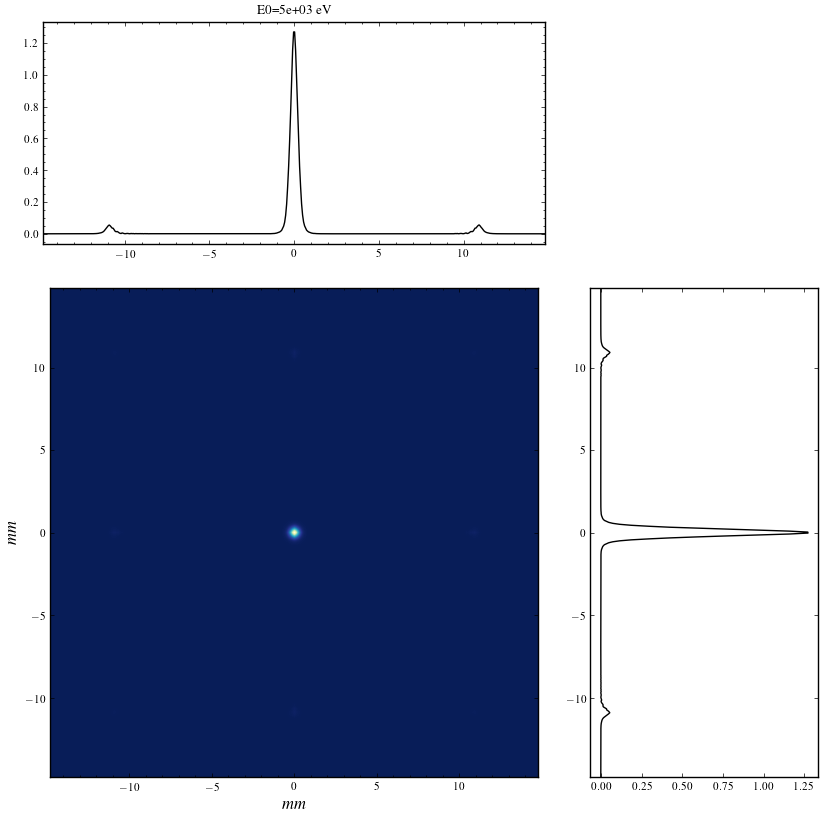

HOM1


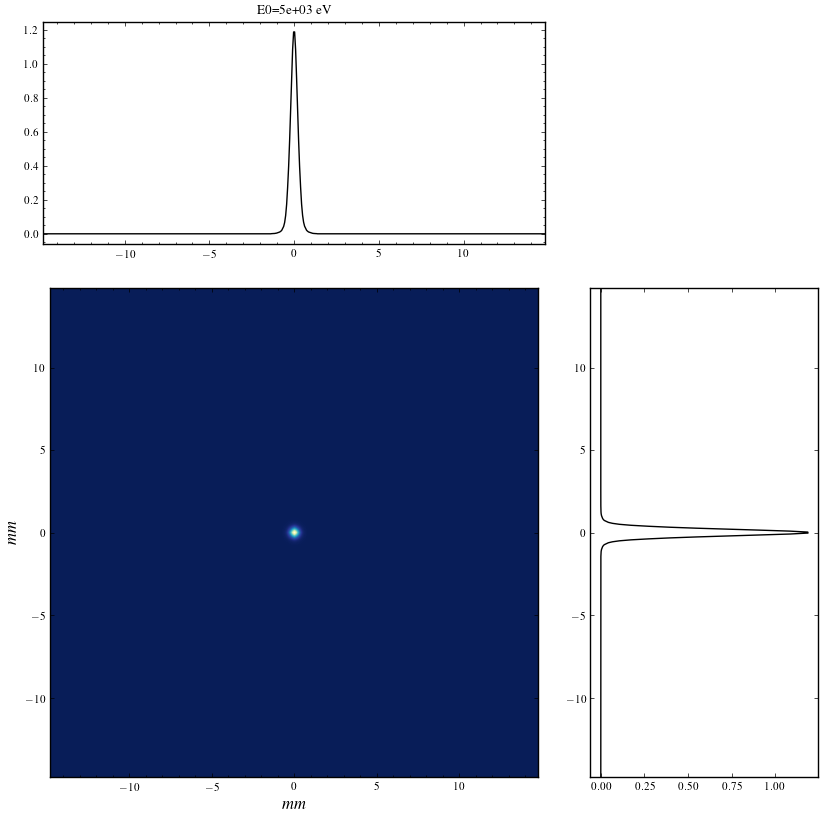

d2


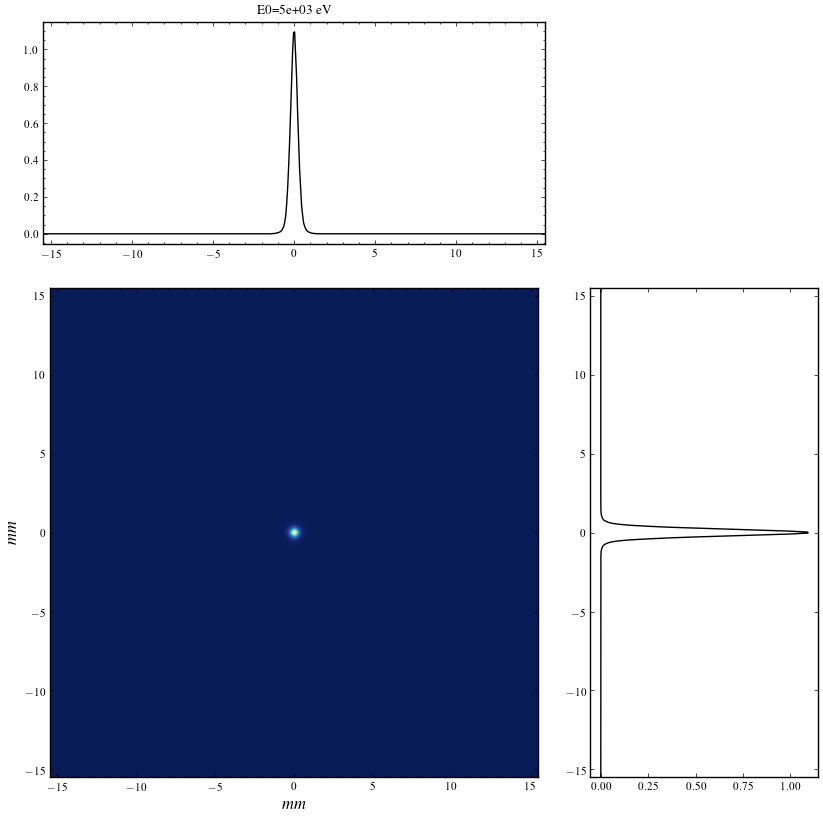

HOM2


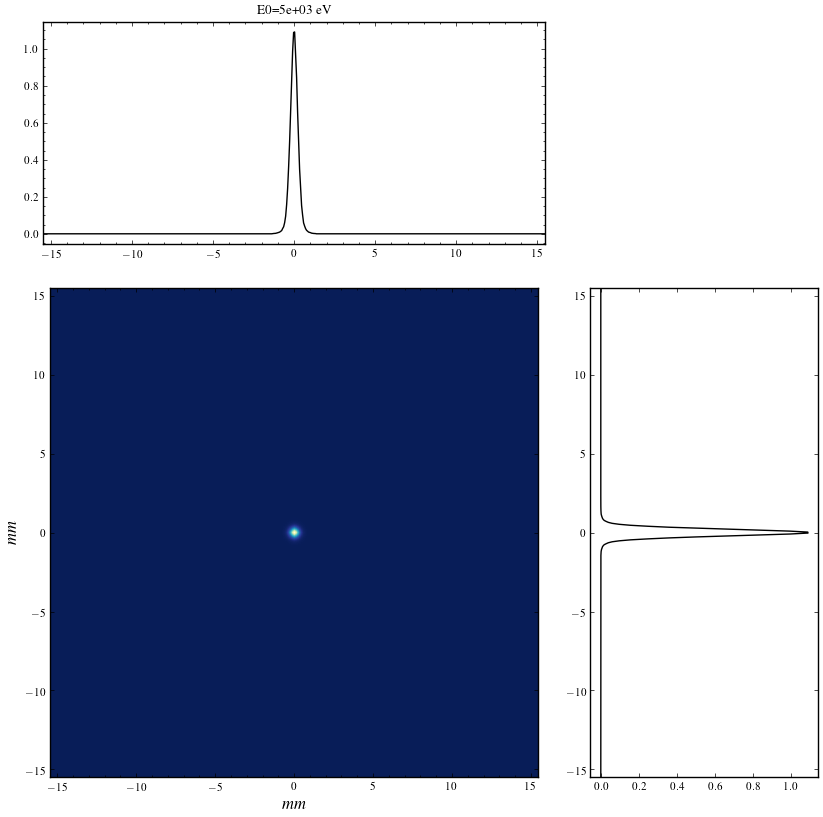

d3


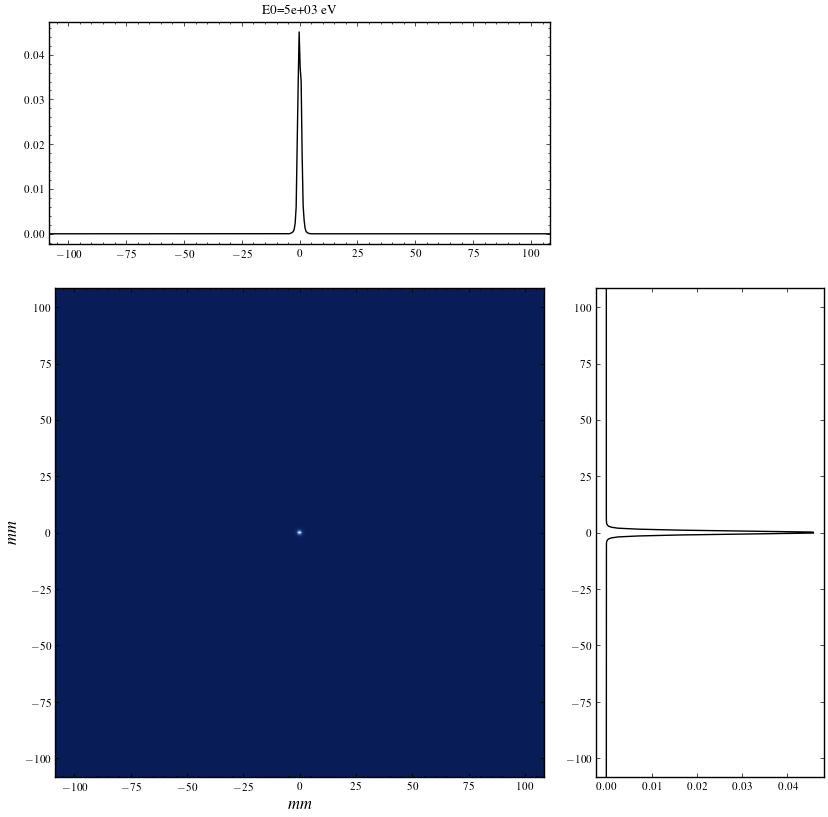

NKB_PSlit


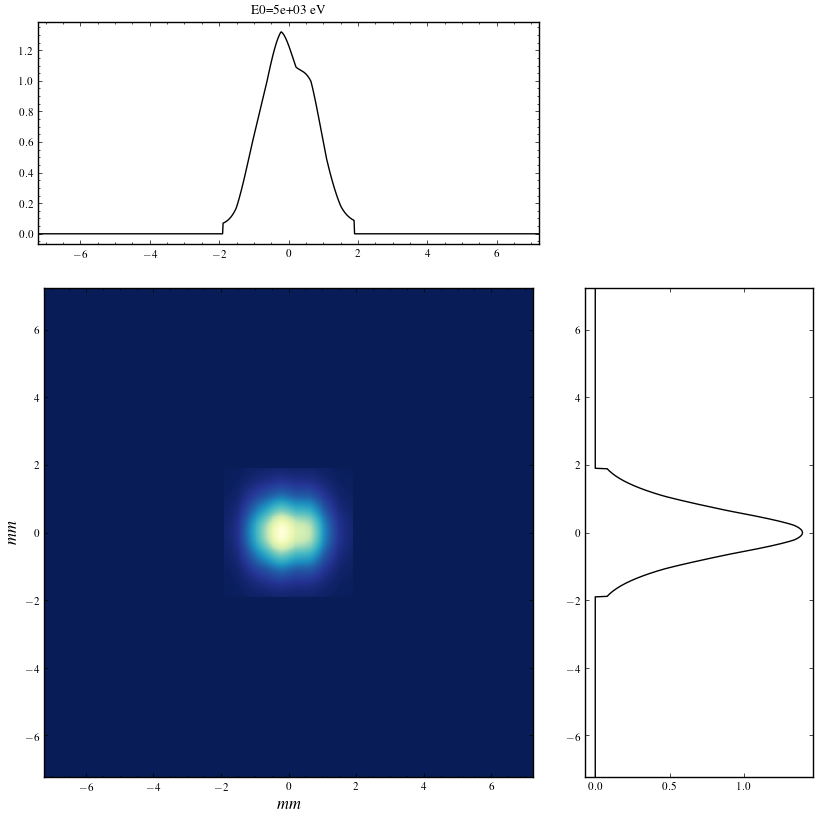

d4


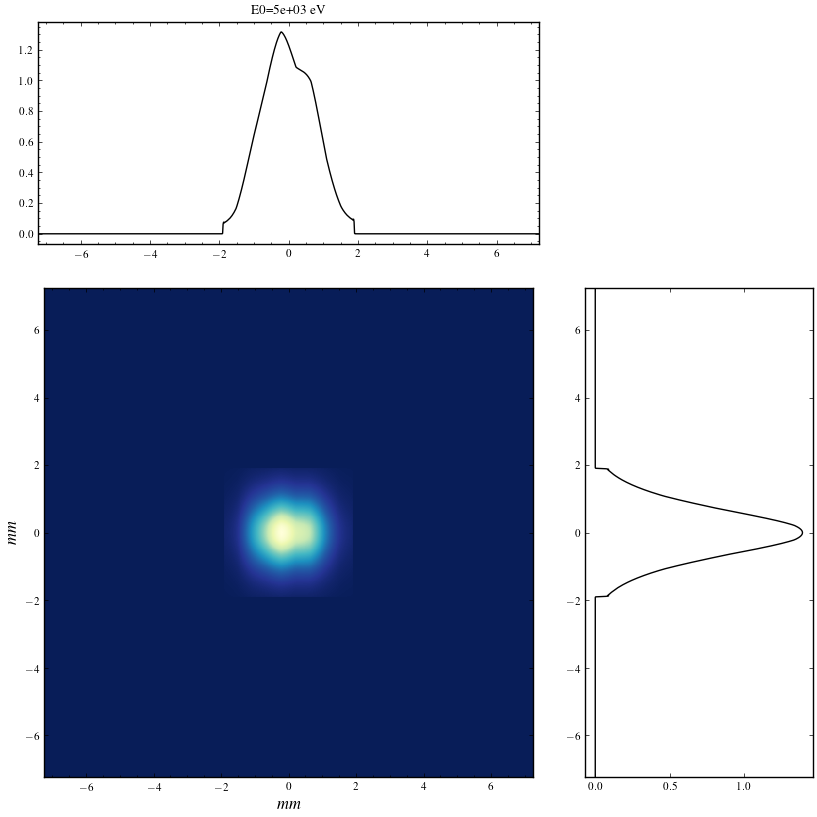

NHE_error


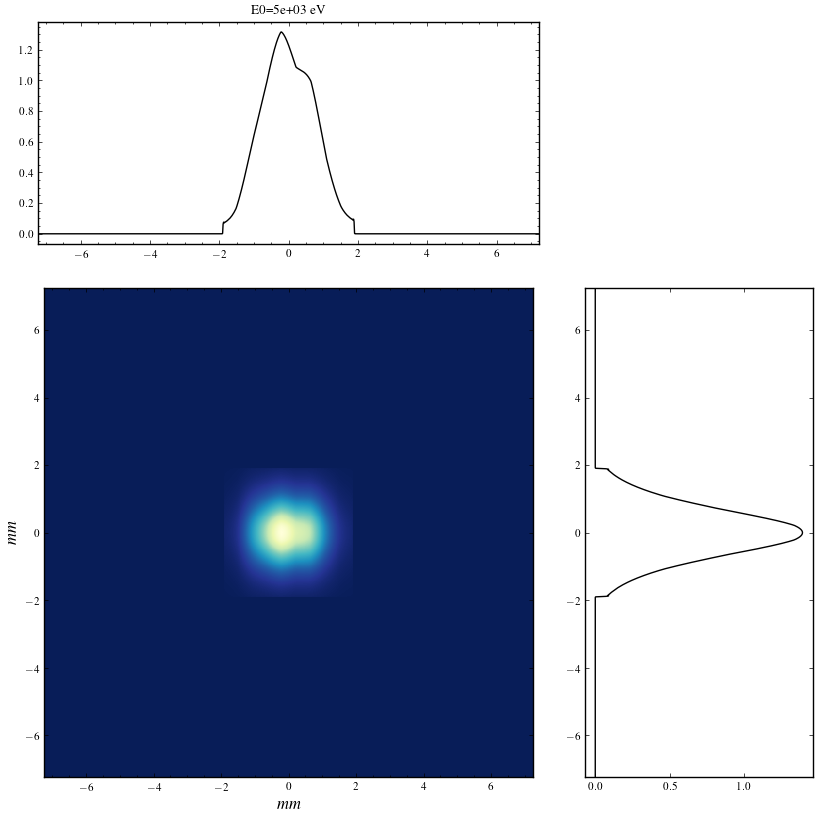

NHE


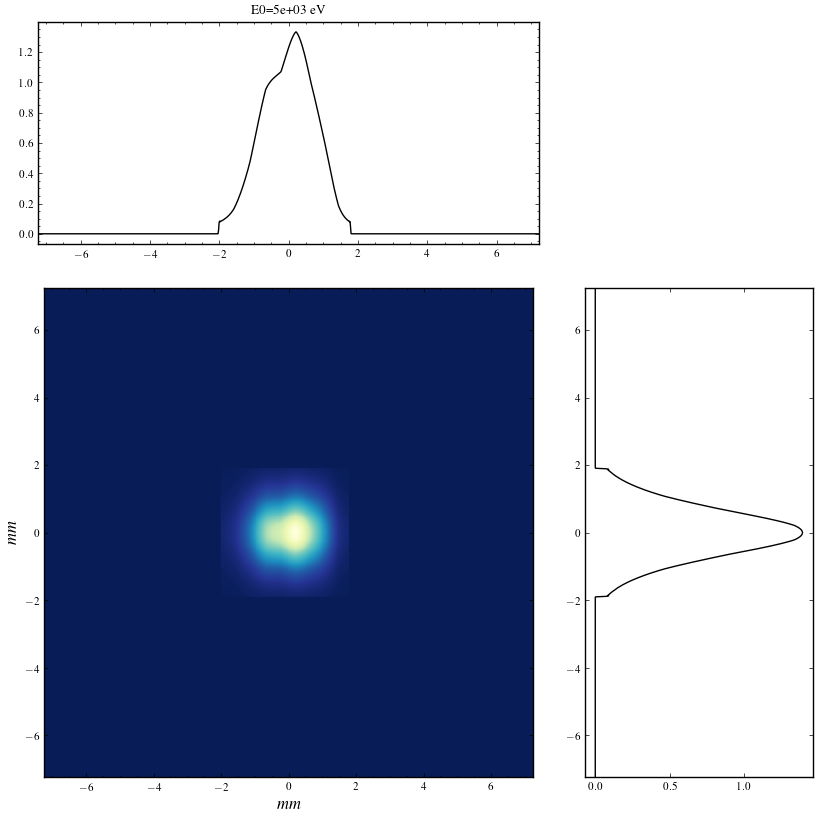

d5


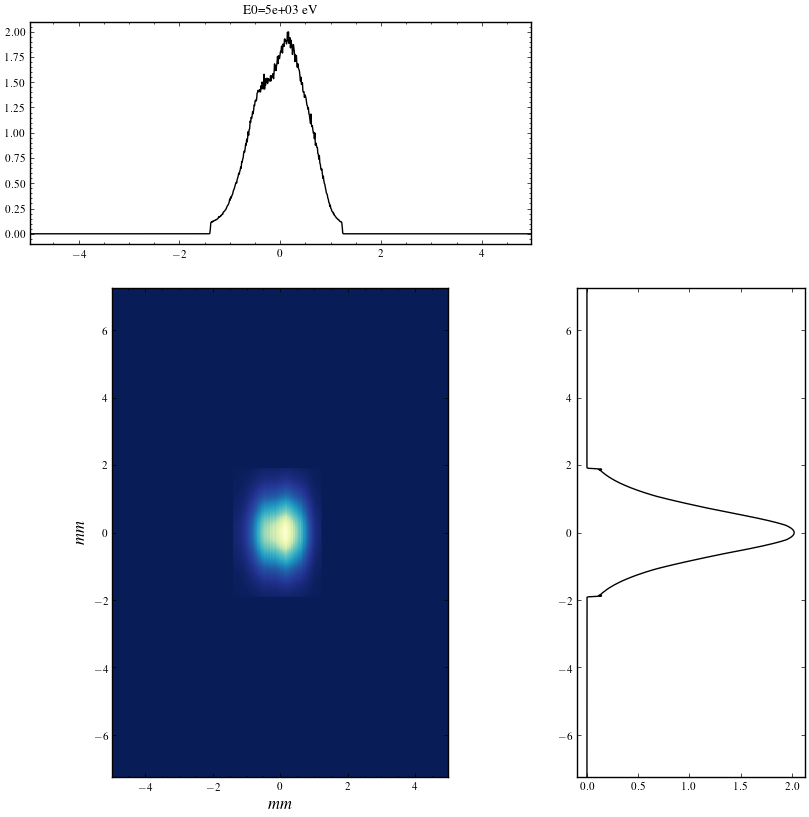

NVE_error


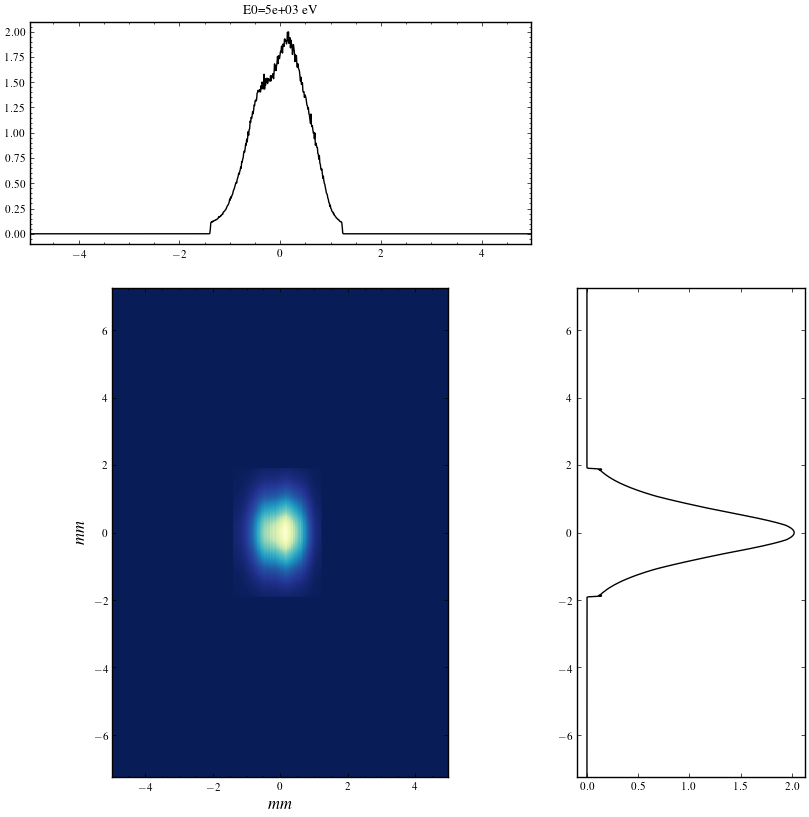

NVE


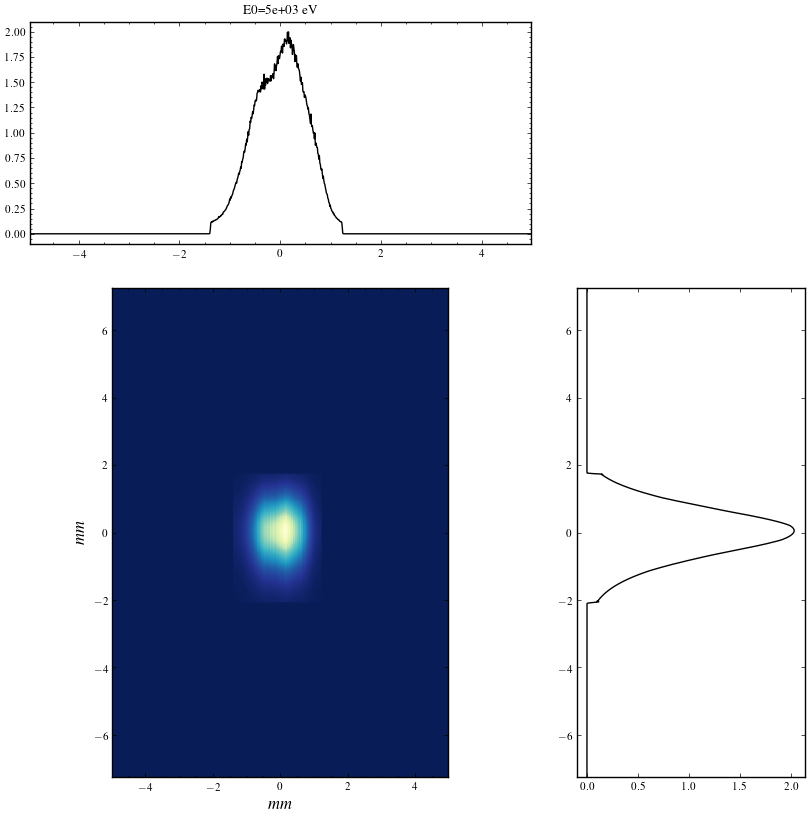

In [2]:
DLOC = dCache + "NanoKB-Pulse/source/"

## load wpg wavefront
wfr = Wavefront()
wfr.load_hdf5(DLOC + "/NanoKB-Pulse_12.h5")
wfr.set_electric_field_representation('frequency')
print(wfr.custom_fields)
## load bl object (get_beamline object is a static method of the beamline class)
spb = setup_spb(parameter_file = "/gpfs/exfel/data/user/guestt/FELpy/felpy/data/params/spb-sfx_nkb_FAST.json", theta_KB = 5e-03, theta_HOM = 3.5e-03)#bl = spb.bl
bl = spb.bl

## EXEC
bl.propagate_sequential(wfr)

In [3]:
wfr.store_hdf5(dCache + "NVE_fast.h5")